# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

*This notebook was generated with the assistance of AI. Please review all code and results carefully, and exercise caution before drawing any conclusions or reusing code in a research setting.*

---

## Overview

This notebook introduces and demonstrates how to begin working with data from **Dandiset 000563: Allen Institute Openscope - Barcoding**, available at  
[https://dandiarchive.org/dandiset/000563/0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145)

This Dandiset provides electrophysiological data (LFP, spike sorting, optogenetic, behavioral, and more) from mouse visual cortex and associated structures, with a focus on temporally precise neural coding of visual and optogenetic stimuli.

---

## What this notebook covers
- DANDI API basics: Enumerating NWB files and exploring assets
- Loading NWB files using remote streaming (without full download)
- Exploring and visualizing LFP time series data
- Exploring spike-sorting outputs with the `units` table, including spike raster plots
- Viewing optogenetic stimulation intervals and metadata
- Accessing and plotting behavioral data (running speed, eye tracking)

The examples use only the methods and techniques demonstrated in the AI-assisted Q&A above.

---

## Required packages

This notebook requires the following Python packages (assumed pre-installed):

- `dandi` (DANDI API client)
- `pynwb` (for NWB data streaming and access)
- `remfile` (for HTTP streaming)
- `h5py` (backend for hdf5)
- `matplotlib` and `numpy` (for data handling and plotting)
- `pandas` (for table access)

Please make sure these are installed in your environment!

---

In [1]:
# Import required packages for all examples
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt

## List available NWB files in the Dandiset

Use the DANDI API to enumerate some of the files available in this Dandiset.

In [2]:
# Connect to the DANDI archive and list NWB files (first 10 for brevity)
dandiset_id = "000563"
dandiset_version = "0.250311.2145"
client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)
assets = dandiset.get_assets_by_glob("*.nwb")
file_list = []
for i, asset in enumerate(assets):
    if i >= 10:
        break
    file_list.append(asset.path)
print("Example NWB files in this Dandiset:")
for fname in file_list:
    print("-", fname)

Example NWB files in this Dandiset:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb
- sub-699241/sub-699241_ses-1318772854_ogen.nwb
- sub-699241/sub-699241_ses-1318772854_probe-2_ecephys.nwb
- sub-699846/sub-699846_ses-1314466742_probe-1_ecephys.nwb
- sub-699846/sub-699846_ses-1314466742_probe-2_ecephys.nwb
- sub-699846/sub-699846_ses-1314466742_probe-4_ecephys.nwb
- sub-699846/sub-699846_ses-1314466742_probe-3_ecephys.nwb


## Load and summarize a specific NWB file

We will focus on `sub-699241/sub-699241_ses-1318772854_ogen.nwb`, which contains both spike sorting and optogenetic data, as well as behavioral and stimulus metadata.

In [3]:
# Locate and prepare the NWB asset for streaming
nwb_asset_path = "sub-699241/sub-699241_ses-1318772854_ogen.nwb"
asset = next(dandiset.get_assets_by_glob(nwb_asset_path))
download_url = asset.download_url

# Stream the NWB file using remfile and h5py
remote_file = remfile.File(download_url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Print some high-level info
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Subject:", vars(nwb.subject) if nwb.subject else None)
print("Acquisition keys:", list(nwb.acquisition.keys()))

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Data and metadata for an Ecephys session
Session start time: 2023-12-19 00:00:00-08:00
Subject: {'_AbstractContainer__container_source': '/home/magland/src/dandi-ai-notebooks-5/notebooks/dandisets/000563/0.250311.2145/fff02479/gpt-4.1/h-1/<remfile.RemFile.RemFile object at 0x7ca59c7cbbc0>', '_AbstractContainer__parent': root pynwb.file.NWBFile at 0x137048980706352
Fields:
  acquisition: {
    EyeTracking <class 'abc.EllipseEyeTracking'>,
    raw_running_wheel_rotation <class 'pynwb.base.TimeSeries'>,
    running_wheel_signal_voltage <class 'pynwb.base.TimeSeries'>,
    running_wheel_supply_voltage <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    OptogeneticStimulusDevice <class 'pynwb.device.Device'>,
    probeA <class 'abc.EcephysProbe'>,
    probeC <class 'abc.EcephysProbe'>,
    probeD <class 'abc.EcephysProbe'>,
    probeE <class 'abc.EcephysProbe'>,
    probeF <class 'abc.EcephysProbe'>
  }
  electrode_groups: {
    probeA <class 'abc.EcephysElectrodeGroup

## Explore spike-sorted data: the units table

The `units` table contains spike times, amplitudes, waveform features, and quality metrics for each sorted unit. We'll display the available columns and show the first 5 rows.

In [4]:
# Access the units table
units_table = nwb.units
units_columns = units_table.colnames
units_df = units_table.to_dataframe().head()  # First 5 rows

print("Units table columns:")
print(units_columns)
print("\nFirst 5 rows of the units table:")
print(units_df)

Units table columns:
('peak_channel_id', 'snr', 'cluster_id', 'quality', 'nn_miss_rate', 'velocity_above', 'repolarization_slope', 'presence_ratio', 'l_ratio', 'recovery_slope', 'spread', 'cumulative_drift', 'local_index', 'waveform_duration', 'velocity_below', 'amplitude_cutoff', 'max_drift', 'amplitude', 'isi_violations', 'isolation_distance', 'nn_hit_rate', 'PT_ratio', 'waveform_halfwidth', 'd_prime', 'silhouette_score', 'firing_rate', 'spike_times', 'spike_amplitudes', 'waveform_mean')

First 5 rows of the units table:
    peak_channel_id       snr  cluster_id quality  nn_miss_rate  \
id                                                                
15                0  4.266568           0    good      0.001088   
16                2  3.548613           1    good      0.000237   
17                1  2.785697           2    good      0.002463   
18                2  2.814532           3    good      0.006789   
19                2  2.896491           4    good      0.017650   

 

## Visualize spike times for a single unit

We'll plot the spike raster (event plot) for unit id 15, zoomed to a 30-second window starting from the first detected spike.


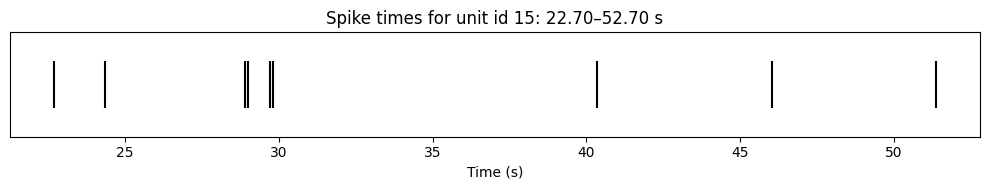

In [5]:
# Extract spike times for unit id 15 from the units DataFrame
unit_id = 15
spike_times_all = nwb.units.to_dataframe().loc[unit_id, 'spike_times']

# Select a 30-second window after the first spike
window_start = float(np.min(spike_times_all))
window_end = window_start + 30
in_window = [t for t in spike_times_all if window_start <= t <= window_end]

# Plot a raster of spike events in this window
plt.figure(figsize=(10, 2))
plt.eventplot(in_window, orientation='horizontal', colors='k')
plt.xlabel('Time (s)')
plt.yticks([])
plt.title(f'Spike times for unit id {unit_id}: {window_start:.2f}–{window_end:.2f} s')
plt.tight_layout()
plt.show()

## Summarize optogenetic stimulation intervals

The optogenetic stimulation epochs are found in the `optotagging` processing module as the `optogenetic_stimulation` interface.

In [6]:
# Access the optogenetic stimulation table
optotag_mod = nwb.processing['optotagging']
optogenetic_stim = optotag_mod.data_interfaces['optogenetic_stimulation']
stim_cols = optogenetic_stim.colnames
stim_rows = optogenetic_stim.to_dataframe().head()
print("Optogenetic stimulation columns:")
print(stim_cols)
print("\nFirst 5 rows of the table:")
print(stim_rows)

Optogenetic stimulation columns:
('start_time', 'condition', 'level', 'stop_time', 'stimulus_name', 'duration', 'tags', 'timeseries')

First 5 rows of the table:
    start_time                     condition  level   stop_time  \
id                                                                
0   7270.95571      Each pulse is 10 ms wide   1.94  7271.95571   
1   7273.09679  half-period of a cosine wave   1.94  7274.09679   
2   7275.06681  half-period of a cosine wave   2.05  7276.06681   
3   7276.87680      Each pulse is 10 ms wide   1.94  7277.87680   
4   7278.99756       Each pulse is 6 ms wide   2.05  7279.99756   

        stimulus_name  duration                   tags  \
id                                                       
0    5 hz pulse train       1.0  [optical_stimulation]   
1       raised_cosine       1.0  [optical_stimulation]   
2       raised_cosine       1.0  [optical_stimulation]   
3    5 hz pulse train       1.0  [optical_stimulation]   
4   40 hz pulse trai

## Explore behavioral data: running speed

We can plot 60 seconds of running speed data from the `running_speed` interface in the `running` processing module.

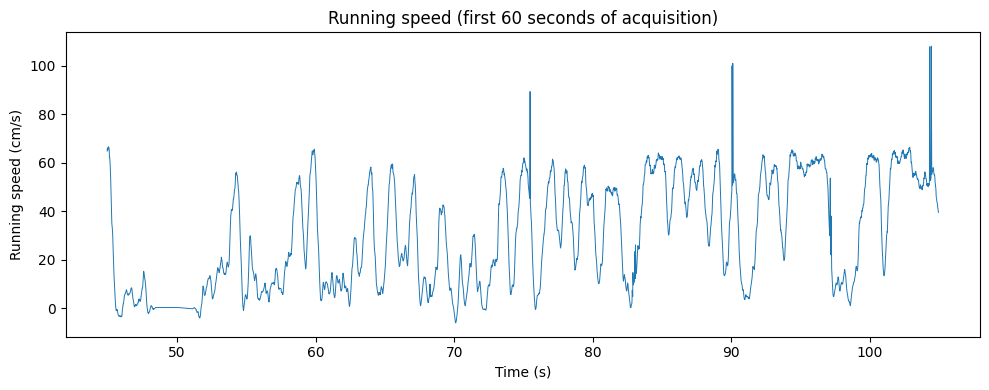

In [7]:
# Access and plot running speed for the first 60 seconds
running_mod = nwb.processing['running']
running_speed = running_mod.data_interfaces['running_speed']
rs_timestamps = running_speed.timestamps[:]
rs_data = running_speed.data[:]
rs_start = rs_timestamps[0]
rs_end = rs_start + 60
rs_idx = np.where((rs_timestamps >= rs_start) & (rs_timestamps <= rs_end))[0]

plt.figure(figsize=(10, 4))
plt.plot(rs_timestamps[rs_idx], rs_data[rs_idx], lw=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Running speed (cm/s)')
plt.title('Running speed (first 60 seconds of acquisition)')
plt.tight_layout()
plt.show()

## Explore behavioral data: eye tracking coordinates

The `EyeTracking` group in acquisition contains several time series, including `corneal_reflection_tracking`. We'll plot the X and Y coordinates for the first 10 seconds from the start of this stream.

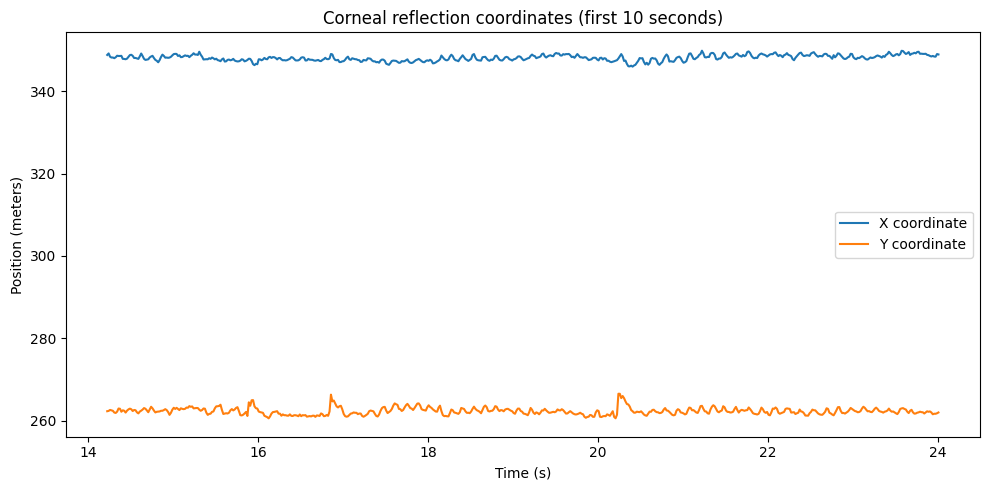

In [8]:
eye_tracking_ts = nwb.acquisition['EyeTracking'].spatial_series['corneal_reflection_tracking']
et_data = eye_tracking_ts.data[:]
et_timestamps = eye_tracking_ts.timestamps[:]
et_start = et_timestamps[0]
et_end = et_start + 10
et_idx = np.where((et_timestamps >= et_start) & (et_timestamps <= et_end))[0]

plt.figure(figsize=(10, 5))
plt.plot(et_timestamps[et_idx], et_data[et_idx, 0], label='X coordinate')
plt.plot(et_timestamps[et_idx], et_data[et_idx, 1], label='Y coordinate')
plt.xlabel('Time (s)')
plt.ylabel('Position (meters)')
plt.title('Corneal reflection coordinates (first 10 seconds)')
plt.legend()
plt.tight_layout()
plt.show()

## Next steps

This notebook gives you a head start in remote exploration of Dandiset 000563. You can follow this pattern to:
- Visualize LFP or other extracellular traces by browsing acquisition keys
- Drill down into any behavioral or stimulus intervals table, or relate events to spike/behavioral data
- Explore additional files and sessions in this Dandiset (see the file listing above)

**Remember:** Inspect all NWB content and metadata before publication or further analysis; review the full Dandiset documentation for scientific context.

---

*For more in-depth exploration, see [DANDI Dandiset 000563](https://dandiarchive.org/dandiset/000563/0.250311.2145).*